<a href="https://colab.research.google.com/github/OmarAfify10/Diabets/blob/main/Diabetes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=c2ababd46afb556acdeef96a72c569a3adcae3d81750e0f1bbea1ba0c82bff4f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:

pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## for explainer
from lime import lime_tabular

In [ ]:
dtf = pd.read_csv('diabetes_data.csv')
dtf.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
dtf.describe(include='all')

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dtf.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [ ]:
#Heatmap to show the Categorical , Numerical data and Nan values
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

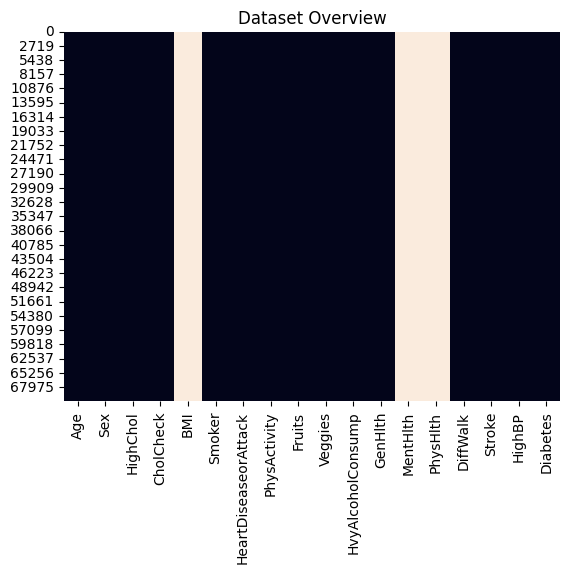

 Categerocial   Numeric   NaN 


In [ ]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

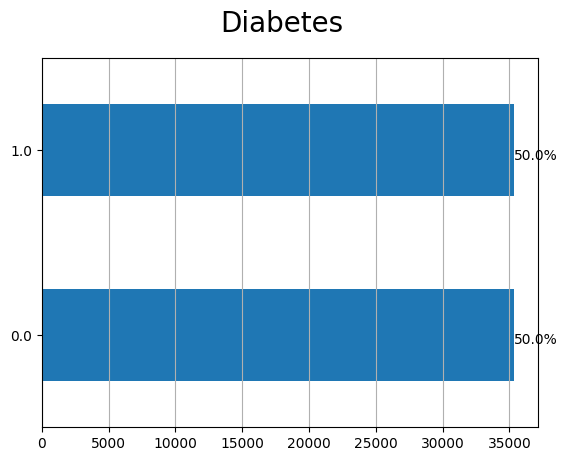

In [ ]:
#this step is to check wether the data is balanced or not .
y = "Diabetes"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

Text(0.5, 1.0, 'Smokers (filter: Y)')

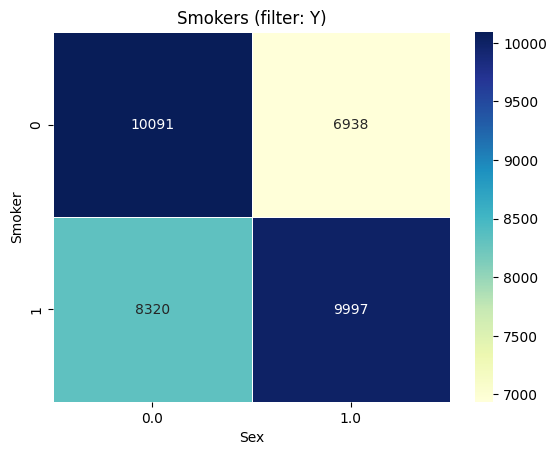

In [ ]:
## this gragh show how many male and female smokers and non smokers have diabetes .. it shows also that the diabetes percentage is balanced .
# Data is balanced
dtf["Smoker"] = dtf["Smoker"].apply(lambda x: str(x)[0])
## Plot contingency table
cont_table = pd.crosstab(index=dtf["Smoker"],
             columns=dtf["Sex"], values=dtf["Diabetes"], aggfunc="sum")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title(
            'Smokers (filter: Y)' )

<ipython-input-12-1646d72f682e>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


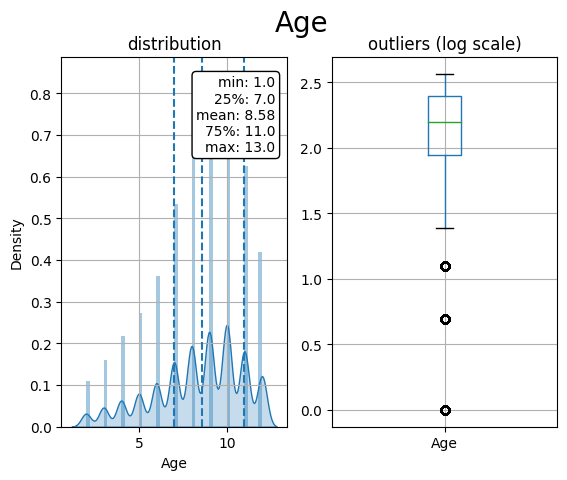

In [ ]:
#to show the distribution of the age in the Data set and also to recognize the outliers values .
x = "Age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()
# we can conclude that we need to remove the values under age 1.5

<ipython-input-13-a07636d146ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dtf.corr(),cmap='rainbow', annot=True)


<Axes: >

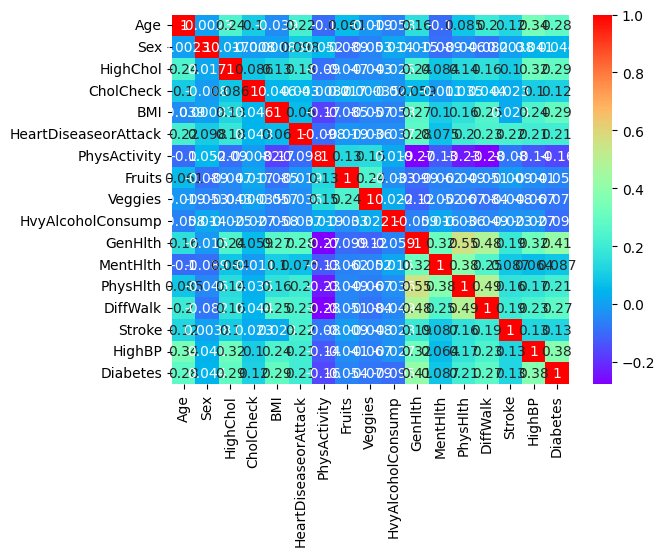

In [ ]:
#Heat map for showing correlations.
sns.heatmap(dtf.corr(),cmap='rainbow', annot=True)

<ipython-input-14-f9d4055689e9>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
<ipython-input-14-f9d4055689e9>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
/usr/l

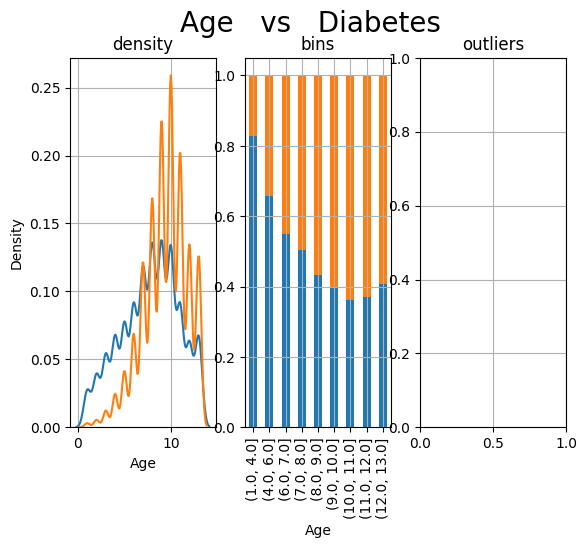

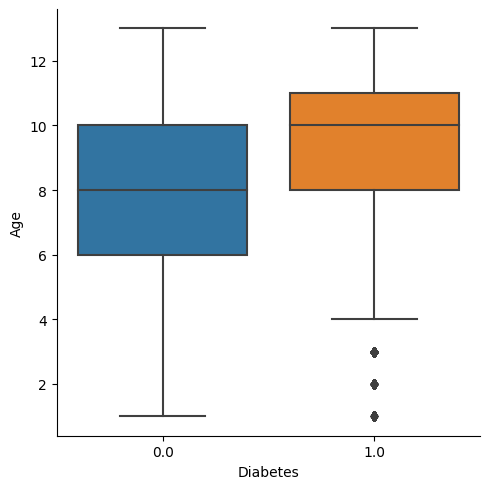

In [ ]:
#the Density Graph show how many people have diabetes as every age
#Box plot to distinguish the ages where people have more diabetes and where they don not have .
y = "Diabetes"
cat, num = "Diabetes", "Age"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)

### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()

In [ ]:
#we can conclude that the people in range Age10 is more subjected to become diabetes Patients .

<ipython-input-15-2b578b9da98f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


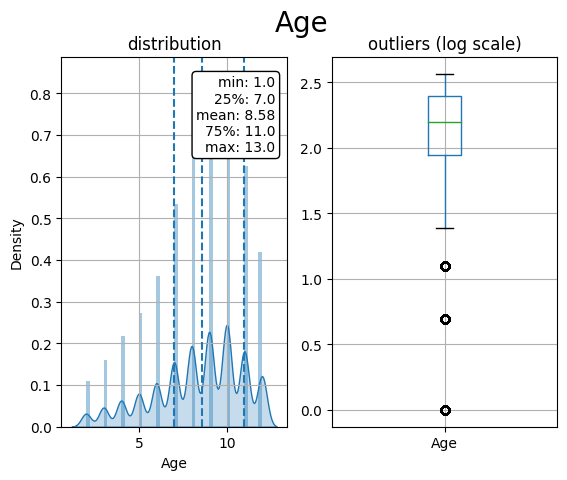

In [ ]:
x = "Age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

<ipython-input-16-7752b25fb44b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

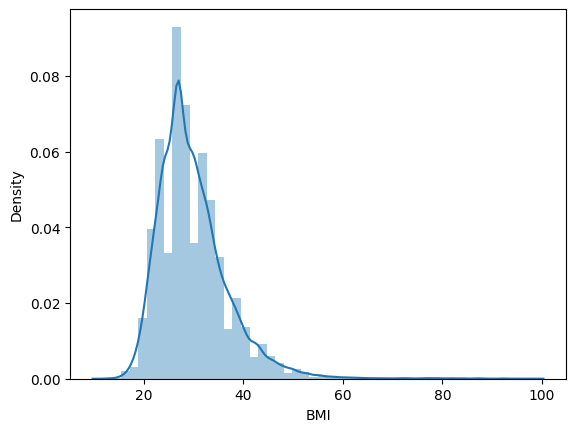

In [ ]:
#this is to check if the BMI od the data set is balanced or not .
sns.distplot(dtf['BMI'])

<ipython-input-17-ce42706d51e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf['GenHlth'])


<Axes: xlabel='GenHlth', ylabel='Density'>

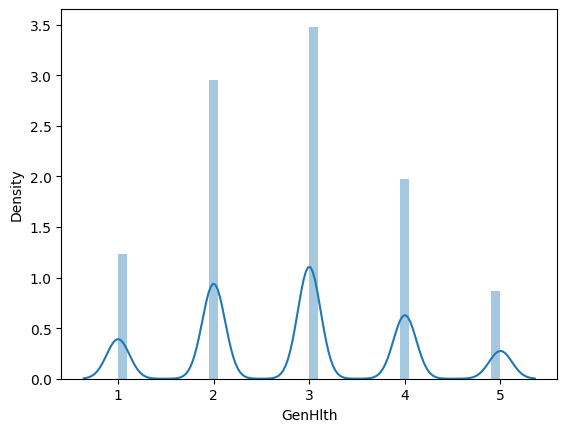

In [ ]:
# to make sure that the dataset tends to have General Health Issues.
sns.distplot(dtf['GenHlth'])

<ipython-input-18-8d290228d917>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf['MentHlth'])


<Axes: xlabel='MentHlth', ylabel='Density'>

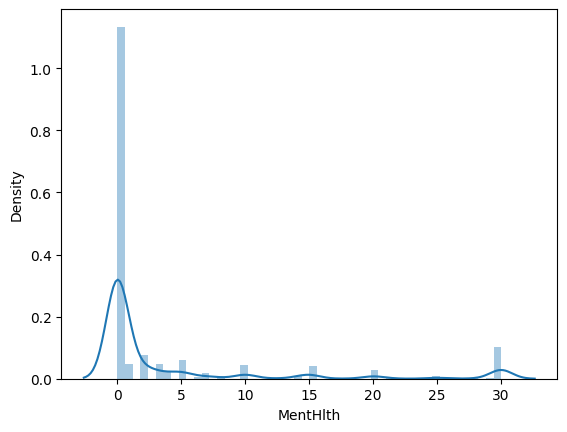

In [ ]:
# to make sure that the dataset tends to have Mental Health Issues
sns.distplot(dtf['MentHlth'])

<ipython-input-19-40bbe4e49e16>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf['PhysHlth'])


<Axes: xlabel='PhysHlth', ylabel='Density'>

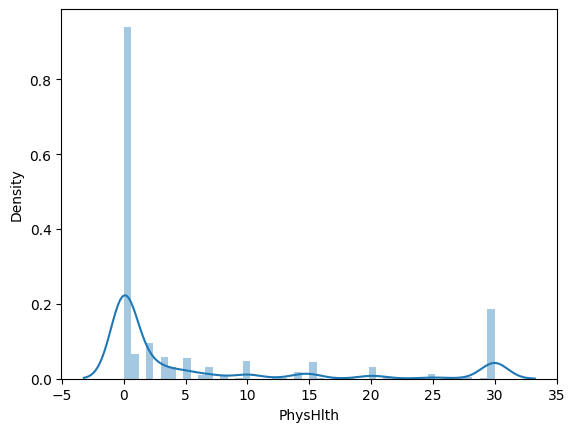

In [ ]:
# to make sure that the dataset tends to have Phy Health Issues
sns.distplot(dtf['PhysHlth'])

# Neuer Abschnitt

In [ ]:
#to show how many smokers and non smokers have diabetes
cat, num = "Diabetes", "Age"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


TypeError: ignored

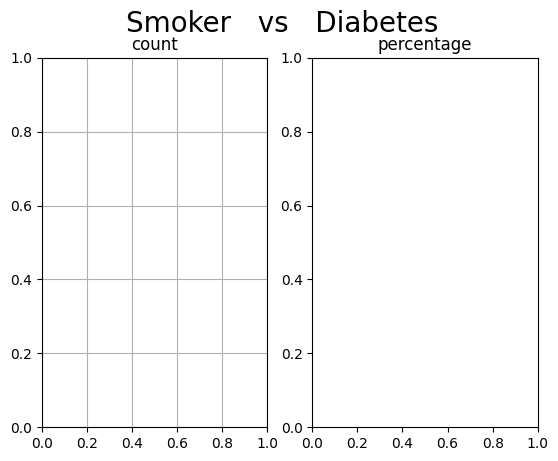

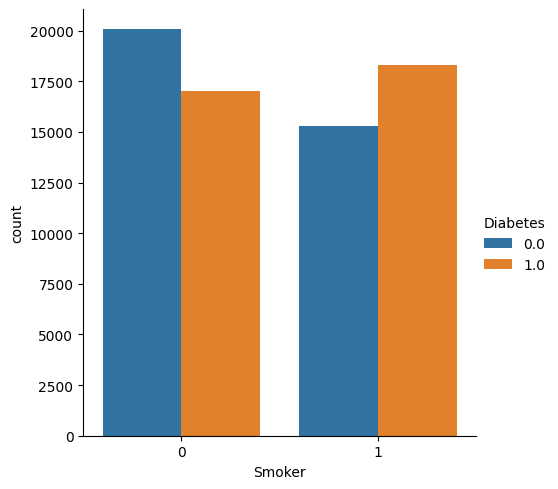

In [ ]:
x, y = "Smoker", "Diabetes"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### count
ax[0].title.set_text('count')
order = dtf.groupby(x)[y].count().index.tolist()
sns.catplot(x=x, hue=y, data=dtf, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = dtf.groupby(x)[y].count().reset_index()
a = a.rename(colomns={y:"tot"})
b = dtf.groupby([x,y])[y].count()
b = b.rename(colomns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b,
            ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

In [ ]:
#removing the outliers
# Define the column name and the threshold(awel change )

age = 'Age'
threshold = 1.5

# Filter the dataset and keep only the rows where the column value is greater than or equal to the threshold
dtf = dtf[dtf[age] >= threshold]
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   69713 non-null  float64
 1   Sex                   69713 non-null  float64
 2   HighChol              69713 non-null  float64
 3   CholCheck             69713 non-null  float64
 4   BMI                   69713 non-null  float64
 5   Smoker                69713 non-null  object 
 6   HeartDiseaseorAttack  69713 non-null  float64
 7   PhysActivity          69713 non-null  float64
 8   Fruits                69713 non-null  float64
 9   Veggies               69713 non-null  float64
 10  HvyAlcoholConsump     69713 non-null  float64
 11  GenHlth               69713 non-null  float64
 12  MentHlth              69713 non-null  float64
 13  PhysHlth              69713 non-null  float64
 14  DiffWalk              69713 non-null  float64
 15  Stroke             

In [ ]:
dtf.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

Data Preprocessing# Droping CholCheck COLUMN & Romving all Nan Values

In [ ]:
dtf=dtf.drop('CholCheck',axis=1)
dtf.head()

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = dtf[['Age','Sex','HighChol','BMI','Smoker','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth','DiffWalk',
       'Stroke', 'HighBP']]

In [ ]:
y = dtf['Diabetes']

In [ ]:
print('Before removing NaN values:')
print(X.isnull().sum())

# remove NaN values in all columns of X
X = X.dropna()

# check for NaN values in all columns of X again
print('After removing NaN values:')
print(X.isnull().sum())

Before removing NaN values:
Age                     0
Sex                     0
HighChol                0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64
After removing NaN values:
Age                     0
Sex                     0
HighChol                0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()

In [ ]:

lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Predictios = lr.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Predictios))
print('\n')
print(confusion_matrix(y_test,Predictios))
# evaluating Logisticregression Model


              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     10347
         1.0       0.73      0.77      0.75     10567

    accuracy                           0.74     20914
   macro avg       0.74      0.74      0.74     20914
weighted avg       0.74      0.74      0.74     20914



[[7397 2950]
 [2423 8144]]


In [ ]:

#knowing the coeff.of the LOGRegression model for each coloumns .
lr.coef_ , X.columns


(array([[ 0.14634676,  0.23822229,  0.57043485,  0.0704509 ,  0.02877418,
          0.1963174 , -0.10863606, -0.02741448, -0.1054641 , -1.16335658,
          0.6093738 , -0.00389994, -0.0084666 ,  0.15863659,  0.11487408,
          0.82416183]]),
 Index(['Age', 'Sex', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
       dtype='object'))

Using Random Forest Model

In [ ]:
#Searching for the best Hyperparameter for the random forest  model
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400]
}

In [ ]:
#I have runned the code in the next cell and it showed the best n estimators is 400
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=400,random_state=42)

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

KeyboardInterrupt: ignored

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [ ]:
rfc_predict=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71     10347
         1.0       0.71      0.77      0.74     10567

    accuracy                           0.73     20914
   macro avg       0.73      0.73      0.73     20914
weighted avg       0.73      0.73      0.73     20914



In [ ]:
cm2 = confusion_matrix(y_test, rfc_predict)
print(cm2)

[[7065 3282]
 [2449 8118]]


In [ ]:
# Knowing the relative importance for the features

# Get the feature importances
importances = rfc.feature_importances_

# Print the feature importances
for feature, importance in zip(dtf, importances):
    print(feature, importance)

Age 0.15160859638478622
Sex 0.03133334832536229
HighChol 0.04206479715281569
BMI 0.21819961673852004
Smoker 0.0341520683012722
HeartDiseaseorAttack 0.021248482205665126
PhysActivity 0.02867154667346819
Fruits 0.03473255351650374
Veggies 0.027307477183558
HvyAlcoholConsump 0.011120811243340656
GenHlth 0.12352718747474513
MentHlth 0.06887087693663593
PhysHlth 0.08896014334316427
DiffWalk 0.027232694818855784
Stroke 0.012164694901773722
HighBP 0.07880510479953308


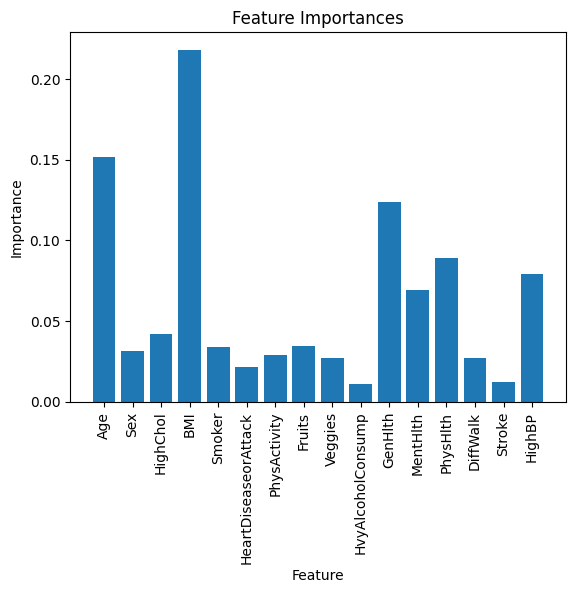

In [ ]:


# Visualize the feature importances
plt.figure()
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), dtf.drop('Diabetes',axis=1), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()








using Bayesian Optimization to find the best Hyperparameter

I tried to use Bayesian Optimization but it couldn't fit the data

In [ ]:
# Define the hyperparameter search space
#space = [
#    Integer(10, 500, name='n_estimators'),
 #   Categorical(['auto', 'sqrt', 'log2'], name='max_features'),
  #  Integer(2, 10, name='max_depth'),
   # Integer(1, 100, name='min_samples_split'),
    #Integer(1, 100, name='min_samples_leaf')
#]

# Define the objective function to optimize
#@use_named_args(space)
#def objective(**params):
 #   clf = RandomForestClassifier(**params, random_state=42)
  #  score = cross_val_score(clf, X, y, cv=5).mean()
  #  return -score  # Minimize the negative score

# Perform Bayesian optimization
#result = gp_minimize(objective, space, n_calls=50, random_state=42)

# Print the best hyperparameters and score
#print("Best parameters:", result.x)
#print("Best score:", -result.fun)

Using Support Vector Machines


In [ ]:
from sklearn.svm import SVC


In [ ]:
model= SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[7050 3297]
 [2000 8567]]


              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73     10347
         1.0       0.72      0.81      0.76     10567

    accuracy                           0.75     20914
   macro avg       0.75      0.75      0.75     20914
weighted avg       0.75      0.75      0.75     20914



the best Model till Now is the SVM